# Extensions of the Bohr model

The Bohr model was very successful at describing the hydrogen atom. Although the small departures of its predictions from experimental results were measurable 100 years ago, it was still an impressive achievement to start from first principles and recover the Rydberg constant to within a few parts in 10,000. Bohr's work forced physicists to take quantization seriously. Here we will explore a few extensions of the Bohr model.

### 1: Ions

Although Bohr's model was formulated for hydrogen, it can also describe the structure of other atoms that have only one electron, such as singly ionized helium (He$^+$) and doubly ionized lithium (Li$^{++}$). Incidentally, ionized helium is an important player in the chemistry of planet-forming disks.

All we need to do to apply Bohr's model to a different atom is replace the Coulomb force law (Equation 5 in <tt>Bohr_model_math.ipynb</tt>). For He$^{+}$, the nuclear charge is $2e$, so the Coulomb force between the nucleus and electron is
### $F = \frac{-2 e^2}{4 \pi \epsilon_0 r^2}$.
For Li$^{++}$, we get 
### $F = \frac{-3 e^2}{4 \pi \epsilon_0 r^2}$.
To figure out what the spectral line wavelengths are for one-electron ions, you can plug the amended Coulomb force law through all the math in <tt>Bohr_model_math.ipynb</tt>. You'll get a slight adjustment to the Rydberg equation:
### $\frac{1}{\lambda} = Z^2 R \left( \frac{1}{n^2} - \frac{1}{k^2} \right)$,     (1)
where $Z$ is the atomic number of the nucleus. Recall that you began a calculation of $R_{\infty}$ in class on 4/3; the correct value of $R$ for the ion you're investigating is a small modification to $R_{\infty}$ that takes into account the mass of the nucleus.

Let's plot the wavelengths of the $n = 1 \ldots 3$, $k = 2 \ldots 4$ He$^{+}$ spectral lines:

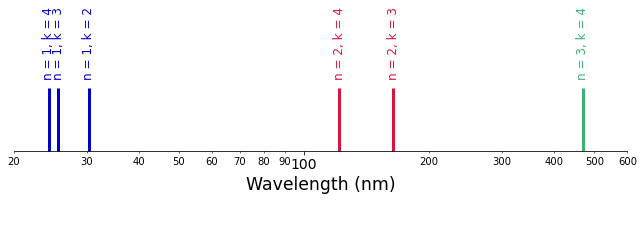

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import constants

# Function to calculate wavelength that corresponds to a transition between energy levels
wave = lambda Z, n, k: 1e9 / (Z**2 * constants.Rydberg * (1/(n**2) - 1/(k**2))) # units: nm

colors = ['mediumblue', 'crimson', 'mediumseagreen']

fig, ax = plt.subplots(figsize=(11,3))
for n in range(1, 4):
    for k in range(n+1, 5):
        lam = wave(2, n, k)
        ax.scatter(lam, 0, marker=2, s=4000, color=colors[n-1], lw=3)
        ax.text(lam, 0.05, f"n = {n}, k = {k}", fontsize='large', color=colors[n-1],
                rotation='vertical', horizontalalignment='center')
ax.set_xscale('log')
ax.spines['bottom'].set_position('center')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax.set_xlabel('Wavelength (nm)', fontsize='xx-large')
ax.tick_params(axis='x', labelsize=14)
ax.set_xlim([20, 600])
ax.xaxis.set_minor_formatter('{x:.0f}')
ax.xaxis.set_major_formatter('{x:.0f}')

### 2: Shells

The single orbiting electron treatment is not generalizable to multi-electron atoms, but the idea of energy levels is. Physicists began to conceptualize more than one electron occupying an orbit, which they then labeled a "shell." Visualize an atomic nucleus surrounded by a series of concentric hamster balls. Each hamster ball has a principal quantum number $n$ and can hold a certain number of electrons. The smallest of the hamster balls, which always has principal quantum number $n = 1$, is called the <strong>K shell</strong>, and it can only hold two electrons. This fact is true for all atoms: H$^{-}$ (hydrogen ion with an extra electron), He, Si, Fe, etc. The electrons can move between hamster balls by emitting or absorbing light, <strong>or</strong> by getting bombarded by other particles, as we shall see.

Suppose you set up a cathode ray tube and shoot a beam of fast-moving electrons at a molybdenum sample. From Chapter 3, you know that the electrons will slow down by emitting bremsstrahlung X-rays. But what if an electron from the beam hits a molybdenum K-shell electron before it gets deflected by a nucleus and is forced to radiate away its kinetic energy? Recall that the total kinetic + potential energy of the Bohr atom is negative, because it's a bound system. <strong>If a cathode ray donates enough energy to the K-shell electron to give the K-shell electron a positive value of total energy, the former K-shell electron is no longer bound to the atom.</strong>

Now you have a vacancy in the K shell: it's supposed to hold two electrons, but it has only one. Since the atom likes to be in the lowest-energy state (the most "bound" state), one of the electrons in a shell with higher $n$ is going to fall into the K shell. To do that, it has to emit a photon. Examine Figure 3.17 in your textbook: the strong peaks in the bremsstrahlung spectrum of molybdenum are spectral lines created by high-level electrons falling into the K shell after a cathode ray has dislodged one of the K electrons. Note, it's also possible to dislodge an electron from $n = 2$ (L shell), $n = 3$ (M shell), or any other shell. In that case, a higher-level electron will fall down to fill the vacancy, but the wavelength of light emitted will be longer (<strong>Ask yourself why?</strong>).

In 1913-1914, Harold Moseley, working in Rutherford's lab, was studying the x-ray spectra of various atoms. He found that a very simple rule would predict the frequency of the K$_{\alpha}$ photon, which is the photon you get when an electron falls from $n = 2$ to $n = 1$. ($n = 3$ to $n = 1$ is K$_{\beta}$, $n = 4$ to $n = 1$ is K$_{\gamma}$, etc. $n = 3$ to $n = 2$ is L$_{\alpha} \ldots$)
### $\nu_{K_{\alpha}} = \frac{3 c R}{4} (Z - 1)^2$,     (2)
where $R$ and $Z$ keep their definitions from above and $c$ is the speed of light. <strong>Can you follow Equations 4.41 and 4.42 in your textbook and derive Moseley's equation (2) from the adjusted Rydberg equation (1) above?</strong>

Let's plot the frequencies and wavelengths of the K$_{\alpha}$ x-rays from atomic number 2 (helium) to 42 (molybdenum). Frequency can be read from the left y-axis, while wavelength will be on the right y-axis.

<ipython-input-2-7ddb00a1a33c>:8: RuntimeWarning: divide by zero encountered in true_divide
  lam_to_freq = lambda lam: 1e9 * constants.c / lam


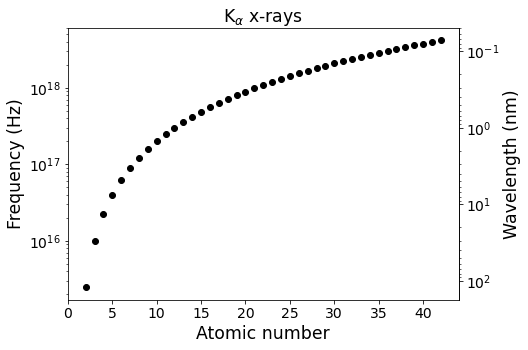

In [2]:
Kalpha_nu = lambda Z: 0.75 * constants.c * constants.Rydberg * (Z-1)**2

atomic_numbers = np.arange(2, 43, 1) # Top number in python range isn't actually included
freq_Kalpha = Kalpha_nu(atomic_numbers)

# These two functions are required for matching wavelength and frequency y-axes
freq_to_lam = lambda freq: 1e9 * constants.c / freq # Wavelength units: nm
lam_to_freq = lambda lam: 1e9 * constants.c / lam

fig, ax1 = plt.subplots(figsize=(7,5))

ax1.set_xlabel('Atomic number', fontsize='xx-large')
ax1.set_ylabel('Frequency (Hz)', fontsize='xx-large')
ax1.tick_params(labelsize=14)
ax1.scatter(atomic_numbers, freq_Kalpha, color='k')
ax1.set_yscale('log')
ax1.set_title(r"K$_{\alpha}$ x-rays", fontsize='xx-large')

ax2 = ax1.secondary_yaxis('right', functions=(freq_to_lam, lam_to_freq))
ax2.set_ylabel('Wavelength (nm)', fontsize='xx-large')
ax2.tick_params(labelsize=14)